A)  Import the image airfield.tif in Python using your own scripts and/or ready functions you find in Python (Scikit-image)

Perform the following operations:

- 1) display the image

- 2) compute the histogram of the image and plot it

- 4) Carry out a histogram equalisation. Has the image changed ?

- 5) plot the histogram of the modified image
- 3) Try to make a contrast adjustment and a brightness adjustment by carrying out simple point operations. Look at the effects on the image.

- 6) Carry out an Otsu threshold on the image, you can programme it on you own or use the function in Scikit-image.

In [31]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import numpy as np

# Filters
from skimage.filters import gaussian

#Thresholding
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu

from skimage import exposure # for hist equalisation

In [32]:
def get_image(name):
    """ Using the skimage.io import the image with the file name.
    This function returns the gray image as numpy array """
    
    #Getting the image  
    #filename = '../Images/'+name
    filename = name
    image = io.imread(filename, as_gray = False) 

    return image

In [33]:
def show_image(image, label ="Image:", size=(6,2), cmap='viridis'):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=size)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap=cmap) 
    plt.show()

# Task1: Display image

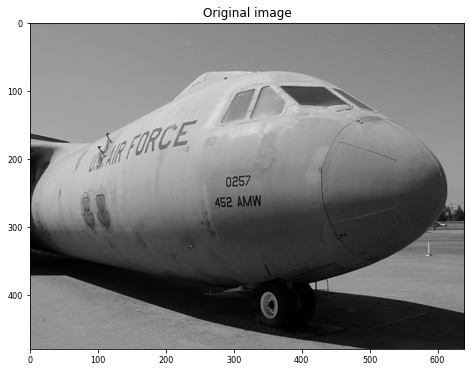

In [34]:
#reading image
image = get_image('airfield.tif')

# # display image
show_image(image, label ="Original image", size=(10,6), cmap='gray')

# Task2: BASIC HISTOGRAM WITH 256 BINS

In [35]:
def make_default_histogram(image):
    histogram = np.zeros(256)
    shape = np.shape(image)
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixval = int(image[i,j])
            histogram[pixval] += 1
    return histogram

def show_histogram(hist, title="histogram"):            
    plt.figure()       
    plt.title(label=title, fontsize=12)
    plt.plot(hist.ravel())
    plt.show()

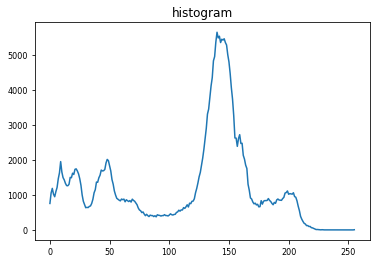

In [36]:
hist = make_default_histogram(image)
    
show_histogram(hist)

# Task4 & Task5: histogram equalisation 
4) Carry out a histogram equalisation. Has the image changed ?

5) plot the histogram of the modified image


# Cumulated histogram

In [48]:
def cumulative_histogram(image):
    histogram = make_default_histogram(image)
    cumhist = np.zeros(256)
    cumhist[0] = histogram[0]
    for i in range(255):
        cumhist[i+1] = cumhist[i] + histogram[i+1]
    return cumhist

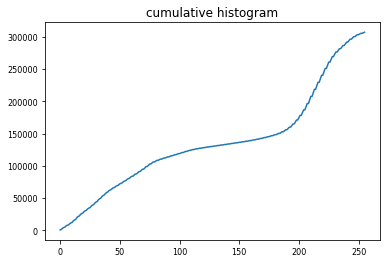

In [49]:
cum_hist = cumulative_histogram(image)
show_histogram(cum_hist, "cumulative histogram")

In [52]:
def histogram_equalisation(image):
    equalised_img = image[:,:]*1
    cum_hist = cumulative_histogram(image)
    shape = np.shape(equalised_img)
    M = shape[0] #Row of image
    N = shape[1] # Col of image
    K = 256

    for i in range(shape[0]):
        for j in range(shape[1]):
            a = int(image[i,j])
            b = cum_hist[a]*(K-1)/(M*N)
            equalised_img[i,j] = b

    return equalised_img 

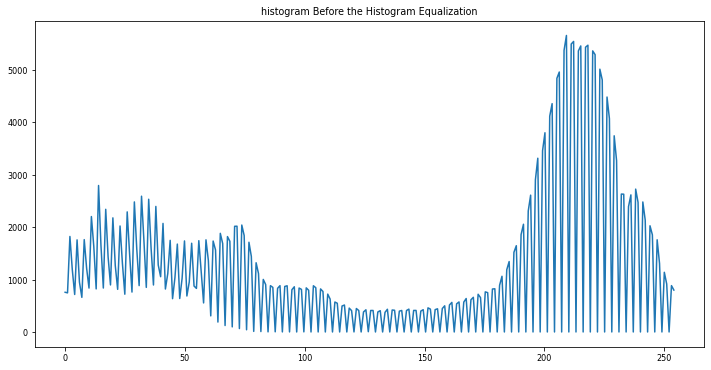

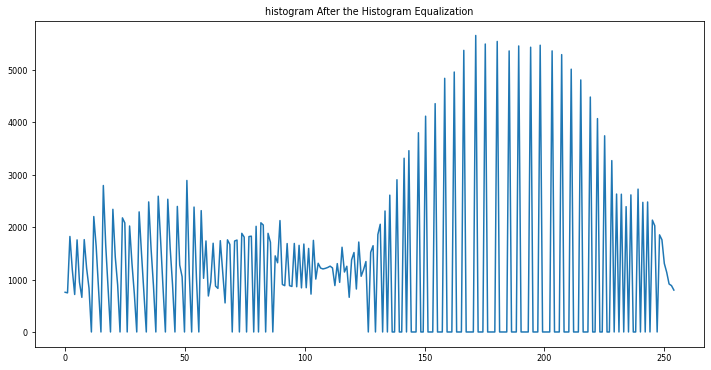

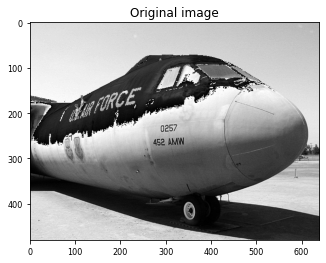

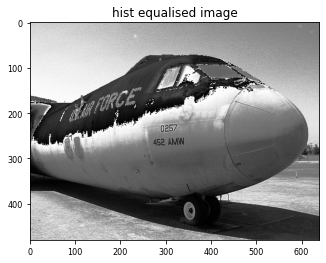

In [53]:
plt.subplots(1, 1,figsize=(12, 6))
plt.title("histogram Before the Histogram Equalization")
hist, bin_edges = np.histogram(image, bins=256)
plt.plot(bin_edges[:-1], hist)  # density=False would make counts
plt.show()

equalised_img = histogram_equalisation(image)

#plotting the histogram After the Histogram Equalization
plt.subplots(1, 1,figsize=(12, 6))
plt.title("histogram After the Histogram Equalization")
hist, bin_edges = np.histogram(equalised_img, bins=256)
plt.plot(bin_edges[:-1], hist)  # density=False would make counts
plt.show()

show_image(image, label ="Original image", size=(8,4), cmap='gray')
show_image(equalised_img, label ="hist equalised image", size=(8,4), cmap='gray')

# Task4: histogram equalisation with skimage 

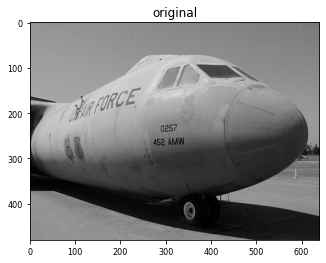

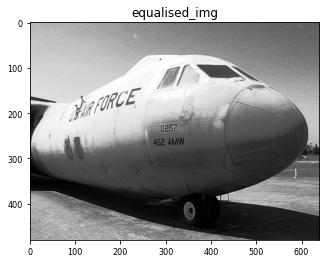

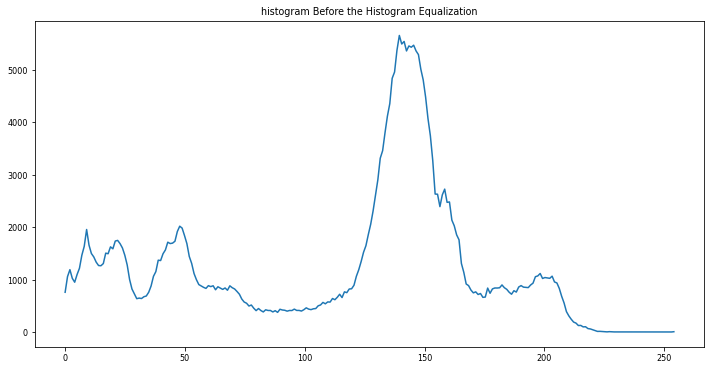

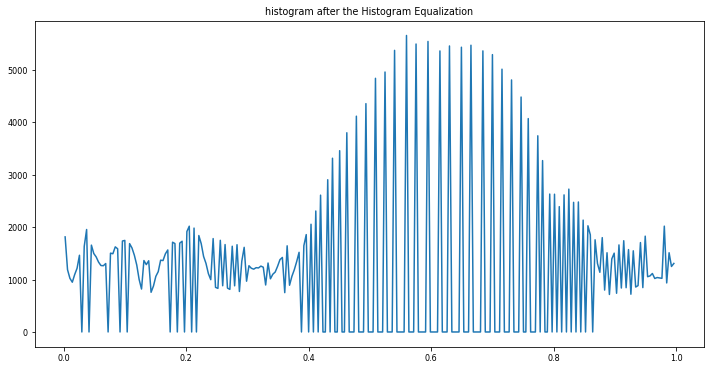

In [39]:
image = get_image('airfield.tif')


equalised_img = exposure.equalize_hist(image)

show_image(image, label ="original", size=(8,4), cmap='gray')
show_image(equalised_img, label ="equalised_img", size=(8,4), cmap='gray')

#plotting the histogram BEFORE the Histogram Equalization
plt.subplots(1, 1,figsize=(12, 6))
plt.title("histogram Before the Histogram Equalization")
hist, bin_edges = np.histogram(image, bins=256)
plt.plot(bin_edges[:-1], hist)  # density=False would make counts
plt.show()


#plotting the histogram after the Histogram Equalization
plt.subplots(1, 1,figsize=(12, 6))
plt.title("histogram after the Histogram Equalization")
hist, bin_edges = np.histogram(equalised_img, bins=256)
plt.plot(bin_edges[:-1], hist)  # density=False would make counts
plt.show()

# Task3: increasing contrast with 50 %
 Try to make a contrast adjustment and a brightness adjustment by carrying out simple point operations. Look at the effects on the image.

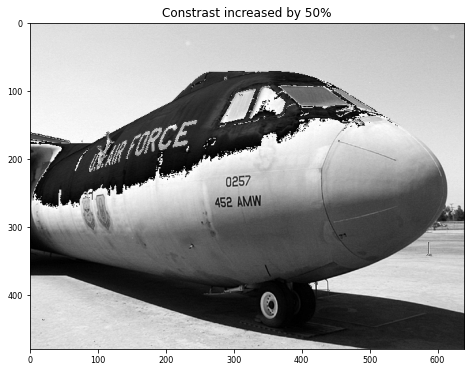

In [42]:
def increase_contrast(image, percentage):
    image_contrast = image[:,:]
    per= 1+((percentage*1.0)/100)
    shape = np.shape(image_contrast)
    for i in range(shape[0]):
        for j in range(shape[1]):
            image_contrast[i,j] = int(image_contrast[i,j]* per+0.5)
            if image_contrast[i,j] > 255:
                image_contrast[i,j] = 255
    return image_contrast

image_contrast = increase_contrast(image, 50)
# # display image
show_image(image_contrast, label ="Constrast increased by 50%", size=(10,6), cmap='gray')

# Task6:  Otsu threshold on the original image with skimage
Carry out an Otsu threshold on the image, you can programme it on you own or use the function in Scikit-image.

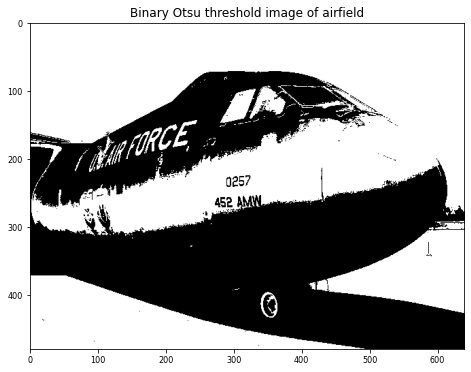

In [43]:
#Thresholding by Otsu
thresh = threshold_otsu(image)
binary = image> thresh

# # display image
show_image(binary, label ="Binary Otsu threshold image of airfield", size=(10,6), cmap='gray')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16512\3103131224.py:54: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype=np.object)


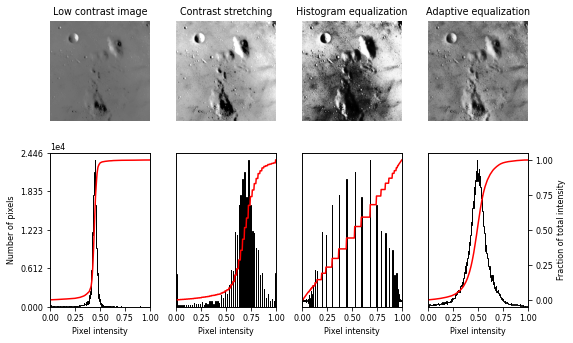

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()